# 线性回归（Linear Regression）

一种使用线性假设函数来预测连续值的算法，其它还包括：

- 单变量线性回归
- 多变量线性回归
- 多项式回归

## 模型：线性假设函数

就是学习到一个hypothesis函数，输入$\boldsymbol{x}$后预测$y$值，$h$函数的形式表示为：

> $h_\theta\left(\boldsymbol{x}\right)=\theta_{0}+\theta_{1}x_1+...+\theta_nx_n$

## 策略：平方误差函数

使用**平方误差函数**作为代价函数，其形式表示为：

> $J(\theta) = \dfrac{1}{2m}\sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)} )^{2}$


## 优化算法

模型的目标为：$minimize \ J(\theta)$，主要有梯度下降与正规方程两种优化算法。

### -->梯度下降 - 迭代算法

梯度下降（Gradient Descent）：一种用来求函数最小值的**迭代算法**，其核心思想在于：**寻找降速最快的方向多次迭代下降靠近最小值**。 

批量梯度下降（batch gradient descent）的算法：  

> $Repeat \ until \ convergence \{ \\ \ \ \theta_j := \theta_j - \alpha\dfrac{\partial}{\partial\theta_j}J(\theta) \\ \}$

需要注意的是：

- 在计算过程中并不需要减小$\alpha$，因为随着越来越靠近最优值，梯度也会变得越来越小；
- 需要同时更新每个$\theta_j$；

### -->正规方程 - 数值解法

正规方程（Normal Equation ）：一种数值的求最小值的算法。假设我们的训练集特征矩阵为 $X$（包含了 $x_{0}=1$）并且我们的训练集结果为向量 $y$，则利用正规方程解出向量:

> $\theta =(X^T X)^{-1}X^{T}y$ 。

需要注意的是：

- 对于**不可逆矩阵**不可以用正规方程方法  
- 正规方程适合特征数目$n$小于10000    
- 正规方程只适合**线性模型**

解决不可逆矩阵：

- 删除多余特征
- 正则化

## 编码实现

In [80]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# 读入数据
train = pd.read_csv("data/housePrice/train.csv")
train = train[train["LotArea"]<12000]
train_X = train["LotArea"].values.reshape(-1, 1)
train_Y = train["SalePrice"].values.reshape(-1, 1)
# print(train["LotArea"].values)
# print(train_X)

### 正规方程

In [87]:
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta
print("Theta:", normalEqn(train_X, train_Y))

Theta: [[18.94498264]]


### 梯度下降方式

In [82]:
# 参数准备
n_samples = train_X.shape[0]
learning_rate = 3
epochs = 1000
display_step = 50  # 每多少次输出一次结果

In [83]:
# 定义输入占位符
X = tf.placeholder(tf.float32, shape=(None, 1))
Y = tf.placeholder(tf.float32, shape=(None, 1))

In [84]:
# 定义模型
with tf.variable_scope("linearAlgebra1", reuse=tf.AUTO_REUSE):
    # 定义变量
    W = tf.get_variable(name="weights", shape=[], dtype=tf.float32, 
                        initializer=tf.random_normal_initializer)
    b = tf.get_variable(name="bias", shape=[], dtype=tf.float32,
                       initializer=tf.constant_initializer)
    # 定义模型
    pred = tf.add(tf.multiply(W, X), b)
    # 定义损失函数
    cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2 * n_samples)
    # 定义优化器
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# 初始化所有变量
init = tf.global_variables_initializer()

Epoch: 49  Cost: 2088584100.0 W: 19.152332 b: 37.50781
Epoch: 99  Cost: 2086691000.0 W: 18.903536 b: 70.529755
Epoch: 149  Cost: 2086286200.0 W: 18.930986 b: 113.34926
Epoch: 199  Cost: 2085859200.0 W: 18.926556 b: 163.73703
Epoch: 249  Cost: 2085378000.0 W: 18.920553 b: 220.57188
Epoch: 299  Cost: 2084849000.0 W: 18.913586 b: 283.06085
Epoch: 349  Cost: 2084277800.0 W: 18.906063 b: 350.6086
Epoch: 399  Cost: 2083668200.0 W: 18.898035 b: 422.74356
Epoch: 449  Cost: 2083023600.0 W: 18.88954 b: 499.0774
Epoch: 499  Cost: 2082346900.0 W: 18.880615 b: 579.2821
Epoch: 549  Cost: 2081640200.0 W: 18.871288 b: 663.0748
Epoch: 599  Cost: 2080905700.0 W: 18.86159 b: 750.2073
Epoch: 649  Cost: 2080146300.0 W: 18.851543 b: 840.4587
Epoch: 699  Cost: 2079362600.0 W: 18.841171 b: 933.6313
Epoch: 749  Cost: 2078557000.0 W: 18.8305 b: 1029.546
Epoch: 799  Cost: 2077730200.0 W: 18.819536 b: 1128.0392
Epoch: 849  Cost: 2076883500.0 W: 18.808304 b: 1228.9608
Epoch: 899  Cost: 2076019100.0 W: 18.796818 b:

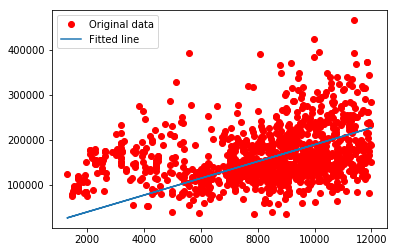

In [85]:
# 开始训练
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(optimizer, feed_dict={X:train_X, Y:train_Y})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Epoch:", epoch, " Cost:", c, "W:", sess.run(W), "b:", sess.run(b))
    # 画图
    plt.plot(train_X, train_Y, "ro", label="Original data")
    plt.plot(train_X, sess.run(W)*train_X+sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()